# Linear Regression Challenge - Hardwork Pays Off
Predicting Exam Scores using Machine Learning

In this challenge, Prateek bhayia gives you walkatime data of his past students and how they performed in the evaluation exam. Your task is to predict the score you will get given the amount of time you spend on coding daily.

Input : You are given one feature corresponding to time noted by walkatime.

Output : A scalar denoting the level of perfomance student achived by devoting the given time.

Download the training data and upload your predictions for the testcases given below

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load and visualize the data

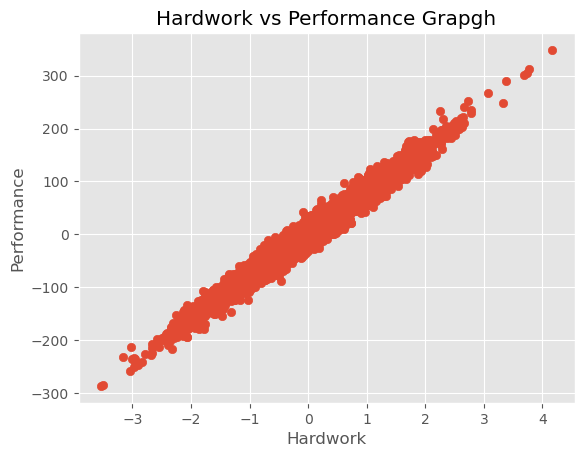

In [95]:
# Load the data
X = pd.read_csv("./Training Data/Linear_X_Train.csv")
y = pd.read_csv("./Training Data/Linear_Y_Train.csv")


# convert to numpy arrays
X = X.values
y = y.values


#Normalize the data -- scale numerical data to a common range
u = X.mean()
std = X.std()
X = (X - u) / std


#Visualize the data
plt.style.use('ggplot')
plt.scatter(X, y)
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.title('Hardwork vs Performance Grapgh')
plt.show()

## Implementing Linear Regression

Hypothesis Function:

$y_{-} = Q_0 + Q_1x$

After Derivation parameters :

$Q_0 = Q_0 - n  \frac{1}{m} \sum_{i=1}^m (y_{-}^{(i)} - y^{(i)})$ 

$Q_1 = Q_1 - n  \frac{1}{m} \sum_{i=1}^m (y_{-}^{(i)} - y^{(i)})x^{(i)}$


In [96]:
# Defining Gradient descent functions

def hypothesis(x, theta):
    y_ = theta[0] + theta[1] * x
    return y_


def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        x = X[i]
        y_ = hypothesis(X[i], theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y) * x

    return grad/m


def error(X, Y, theta):
    m = X.shape[0]
    err = 0.0

    for i in range(m):
        x = X[i]
        y_ = hypothesis(X[i], theta)
        y = Y[i]
        err += (y_ - y) ** 2

    return err/m


def gradientDescent(X, Y, max_steps = 100, learning_rate=0.1):

    theta = np.zeros((2,))
    error_list = []
    theta_list = []

    for i in range(max_steps):

        #Compute grad
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)[0]
        error_list.append(e)

        #Update theta
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

        #Store theta for futurre visualization
        theta_list.append((theta[0], theta[1]))

    return theta, error_list, theta_list



In [97]:
theta, error_list, theta_list = gradientDescent(X, y)

C:\Users\divij\AppData\Local\Temp\ipykernel_18480\2771840629.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0] += (y_ - y)
C:\Users\divij\AppData\Local\Temp\ipykernel_18480\2771840629.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1] += (y_ - y) * x


In [98]:
theta

array([ 0.6838508 , 79.90361453])

In [99]:
error_list

[np.float64(6576.350052461958),
 np.float64(5363.12510257493),
 np.float64(4380.412893166487),
 np.float64(3584.416003545636),
 np.float64(2939.6585229527514),
 np.float64(2417.404963672508),
 np.float64(1994.379580655529),
 np.float64(1651.7290204117544),
 np.float64(1374.1820666143055),
 np.float64(1149.3690340383696),
 np.float64(967.2704776518656),
 np.float64(819.7706469787961),
 np.float64(700.2957841336078),
 np.float64(603.5211452290068),
 np.float64(525.1336877162774),
 np.float64(461.6398471309695),
 np.float64(410.2098362568699),
 np.float64(368.55152744884856),
 np.float64(334.80829731435097),
 np.float64(307.47628090540843),
 np.float64(285.3373476141647),
 np.float64(267.40481164825667),
 np.float64(252.87945751587247),
 np.float64(241.11392066864),
 np.float64(231.58383582238233),
 np.float64(223.86446709691378),
 np.float64(217.6117784292848),
 np.float64(212.54710060850394),
 np.float64(208.44471157367238),
 np.float64(205.12177645545896),
 np.float64(202.4301990097054

Text(0.5, 1.0, 'Reduction in error over iterations')

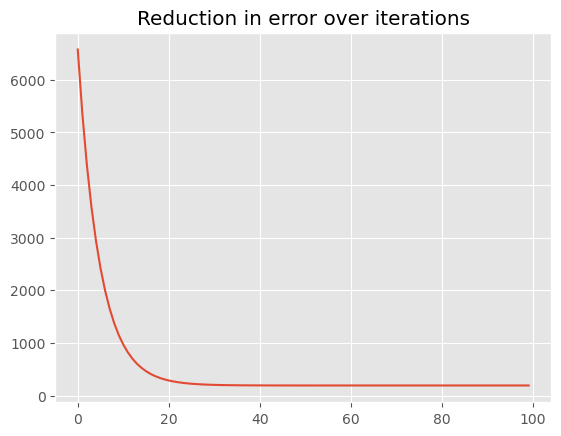

In [100]:
plt.plot(error_list)
plt.title('Reduction in error over iterations')

## Predictions and Best Line

In [101]:
y_ = hypothesis(X, theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


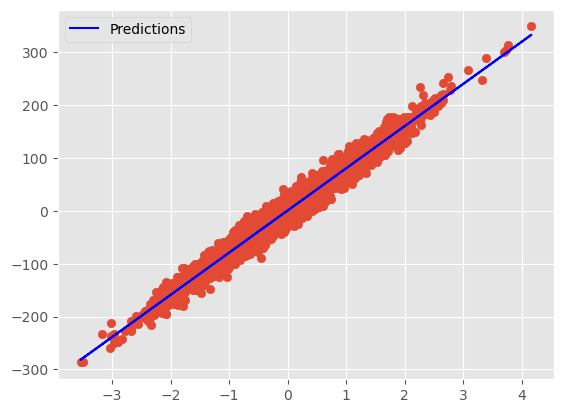

In [102]:
# Training data + Predictions
plt.scatter(X, y)   
plt.plot(X, y_, color='blue', label='Predictions')
plt.legend()
plt.show()

In [103]:
#Loading the test data
X_test = pd.read_csv("./Test Cases/Linear_X_Test.csv").values
y_test = hypothesis(X_test, theta)


In [104]:
df = pd.DataFrame(y_test, columns=['y'])
df.to_csv('y_prediction.csv', index=False)  #and submit this final file :)

## Computing Score
Score : R2(R-squared) or coeff of Determination

Accuracy = R2*100

In [105]:
def r2_score(Y,Y_):
    num = np.sum((Y - Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = 1 - (num/denom)
    return score*100

print(r2_score(y, y_))

97.09612226971643


## Visualising Loss Function, Gradient Descemt, Theta Updates

In [106]:
from mpl_toolkits.mplot3d import Axes3D

In [107]:
theta

array([ 0.6838508 , 79.90361453])

In [108]:
#Loss Actually
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        y_ =  T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y - y_)**2)/y.shape[0]

print(J.shape)

(80, 80)


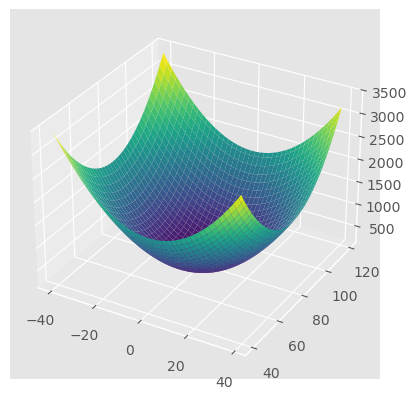

In [109]:
# visualise the loss function J

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.plot_surface(T0, T1, J, cmap='viridis')
plt.show()

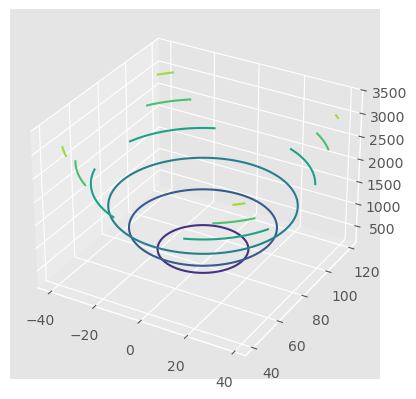

In [110]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.contour(T0, T1, J, cmap='viridis')
plt.show()

In [111]:
#Visualize the theta updates
theta_list = np.array(theta_list)
theta_list

array([[6.83868968e-02, 7.99057369e+00],
       [1.29935104e-01, 1.51820900e+01],
       [1.85328490e-01, 2.16544547e+01],
       [2.35182538e-01, 2.74795829e+01],
       [2.80051181e-01, 3.27221983e+01],
       [3.20432960e-01, 3.74405522e+01],
       [3.56776561e-01, 4.16870707e+01],
       [3.89485801e-01, 4.55089373e+01],
       [4.18924118e-01, 4.89486173e+01],
       [4.45418603e-01, 5.20443292e+01],
       [4.69263640e-01, 5.48304700e+01],
       [4.90724172e-01, 5.73379967e+01],
       [5.10038652e-01, 5.95947707e+01],
       [5.27421684e-01, 6.16258673e+01],
       [5.43066412e-01, 6.34538543e+01],
       [5.57146668e-01, 6.50990426e+01],
       [5.69818898e-01, 6.65797120e+01],
       [5.81223905e-01, 6.79123145e+01],
       [5.91488411e-01, 6.91116567e+01],
       [6.00726467e-01, 7.01910648e+01],
       [6.09040717e-01, 7.11625320e+01],
       [6.16523542e-01, 7.20368525e+01],
       [6.23258085e-01, 7.28237409e+01],
       [6.29319173e-01, 7.35319405e+01],
       [6.347741

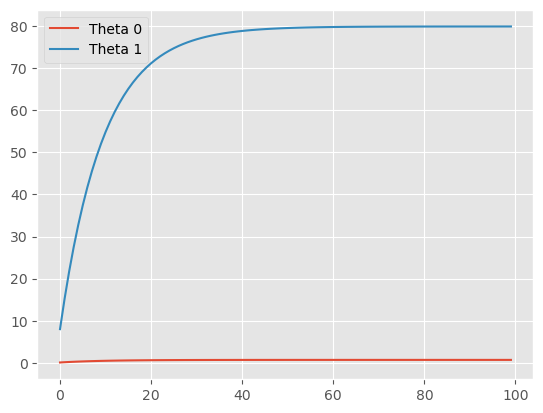

In [112]:
plt.plot(theta_list[:,0], label='Theta 0')
plt.plot(theta_list[:,1], label='Theta 1')
plt.legend()
plt.show()

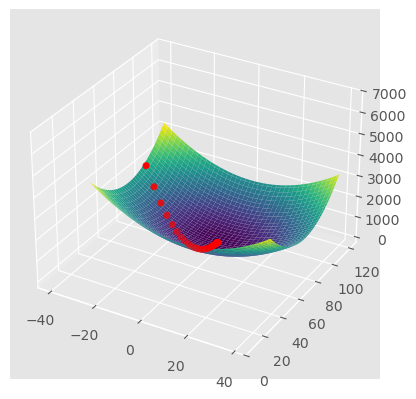

In [114]:
# Trajectory of theta updates on the loss function

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.plot_surface(T0, T1, J, cmap='viridis')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list, color='r', marker='o')
plt.show()

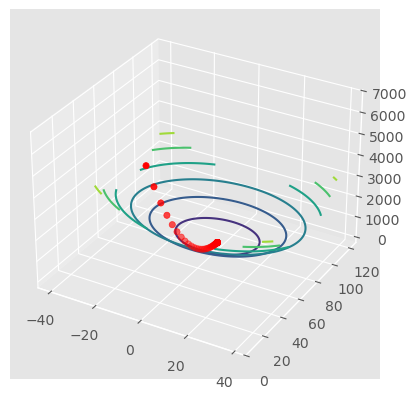

In [115]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.contour(T0, T1, J, cmap='viridis')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list, color='r', marker='o')
plt.show()

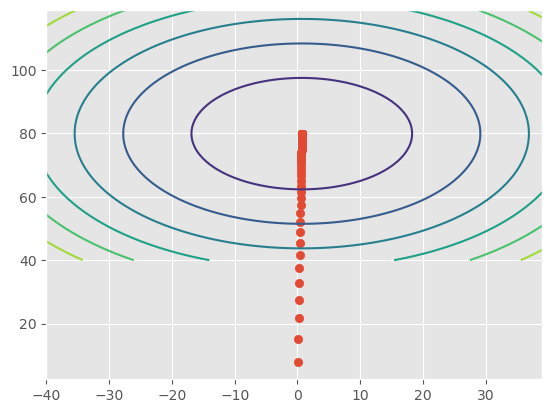

In [118]:
plt.contour(T0, T1, J, cmap='viridis')
plt.scatter(theta_list[:,0], theta_list[:,1])
plt.show()